# Import Libraries and Data

In [1]:
import pandas as pd # dataframe/data cleaning/manipulation
import numpy as np # array computations
from matplotlib import pyplot as plt # plotting/graphing
import seaborn as sns # additional visualizations
import matplotlib.patches as mpatches
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text # Decision tree algorithm and plotting functions for the Decision tree
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay # classification and confusion matrix accuracy metrics along with ROC display function
from sklearn.model_selection import train_test_split, cross_val_score # train test split and cross validation accuracy function

Note: If you are using Google Colab, you must upload the training and testing CSVs from Canvas by doing the following:

* On the left-side bar, click the folder icon.
* Click the 'Upload to session storage' button.
* Upload the two CSV files; they will appear below the 'sample_data' folder.

**Unfortunately, this process must be done every time the runtime is disconnected - just a quirk with Google Colab.**

If you are using Jupyter notebook, just make sure the training and testings CSV files are in the same folder location as this .ipynb file.

In [2]:
training_df = pd.read_csv('training_data.csv',index_col=0)
testing_df = pd.read_csv('testing_data.csv',index_col=0)

# Instantiating a Sample Model

We are again working with the British Bank Dataset with ~ 600 records. We are also pursuing the same goal: predicting whether or not someone will buy a personal equity plan (PEP) based on other data such as age, sex, region, and income.

Now that we know how to instantiate basic models such as a decision tree and logistic regression model, our main goal is to explore several forms of model evaluation. To get started, we will create a sample decision tree model to evaluate.

**Note: The following lines of code should already be familiar to you at this point. If not, please review the DecisionTree_LogisticRegression_Final.ipynb file on Canvas.**

In [3]:
X = training_df.drop(columns = ['pep']) # Features (training data)
y = training_df.pep # Target Variable (training data)
model = DecisionTreeClassifier(criterion = 'entropy', max_depth = 5, random_state = 3).fit(X, y) # Fit a decision tree model - notice how we can instantiate and fit a model in the same line of code!

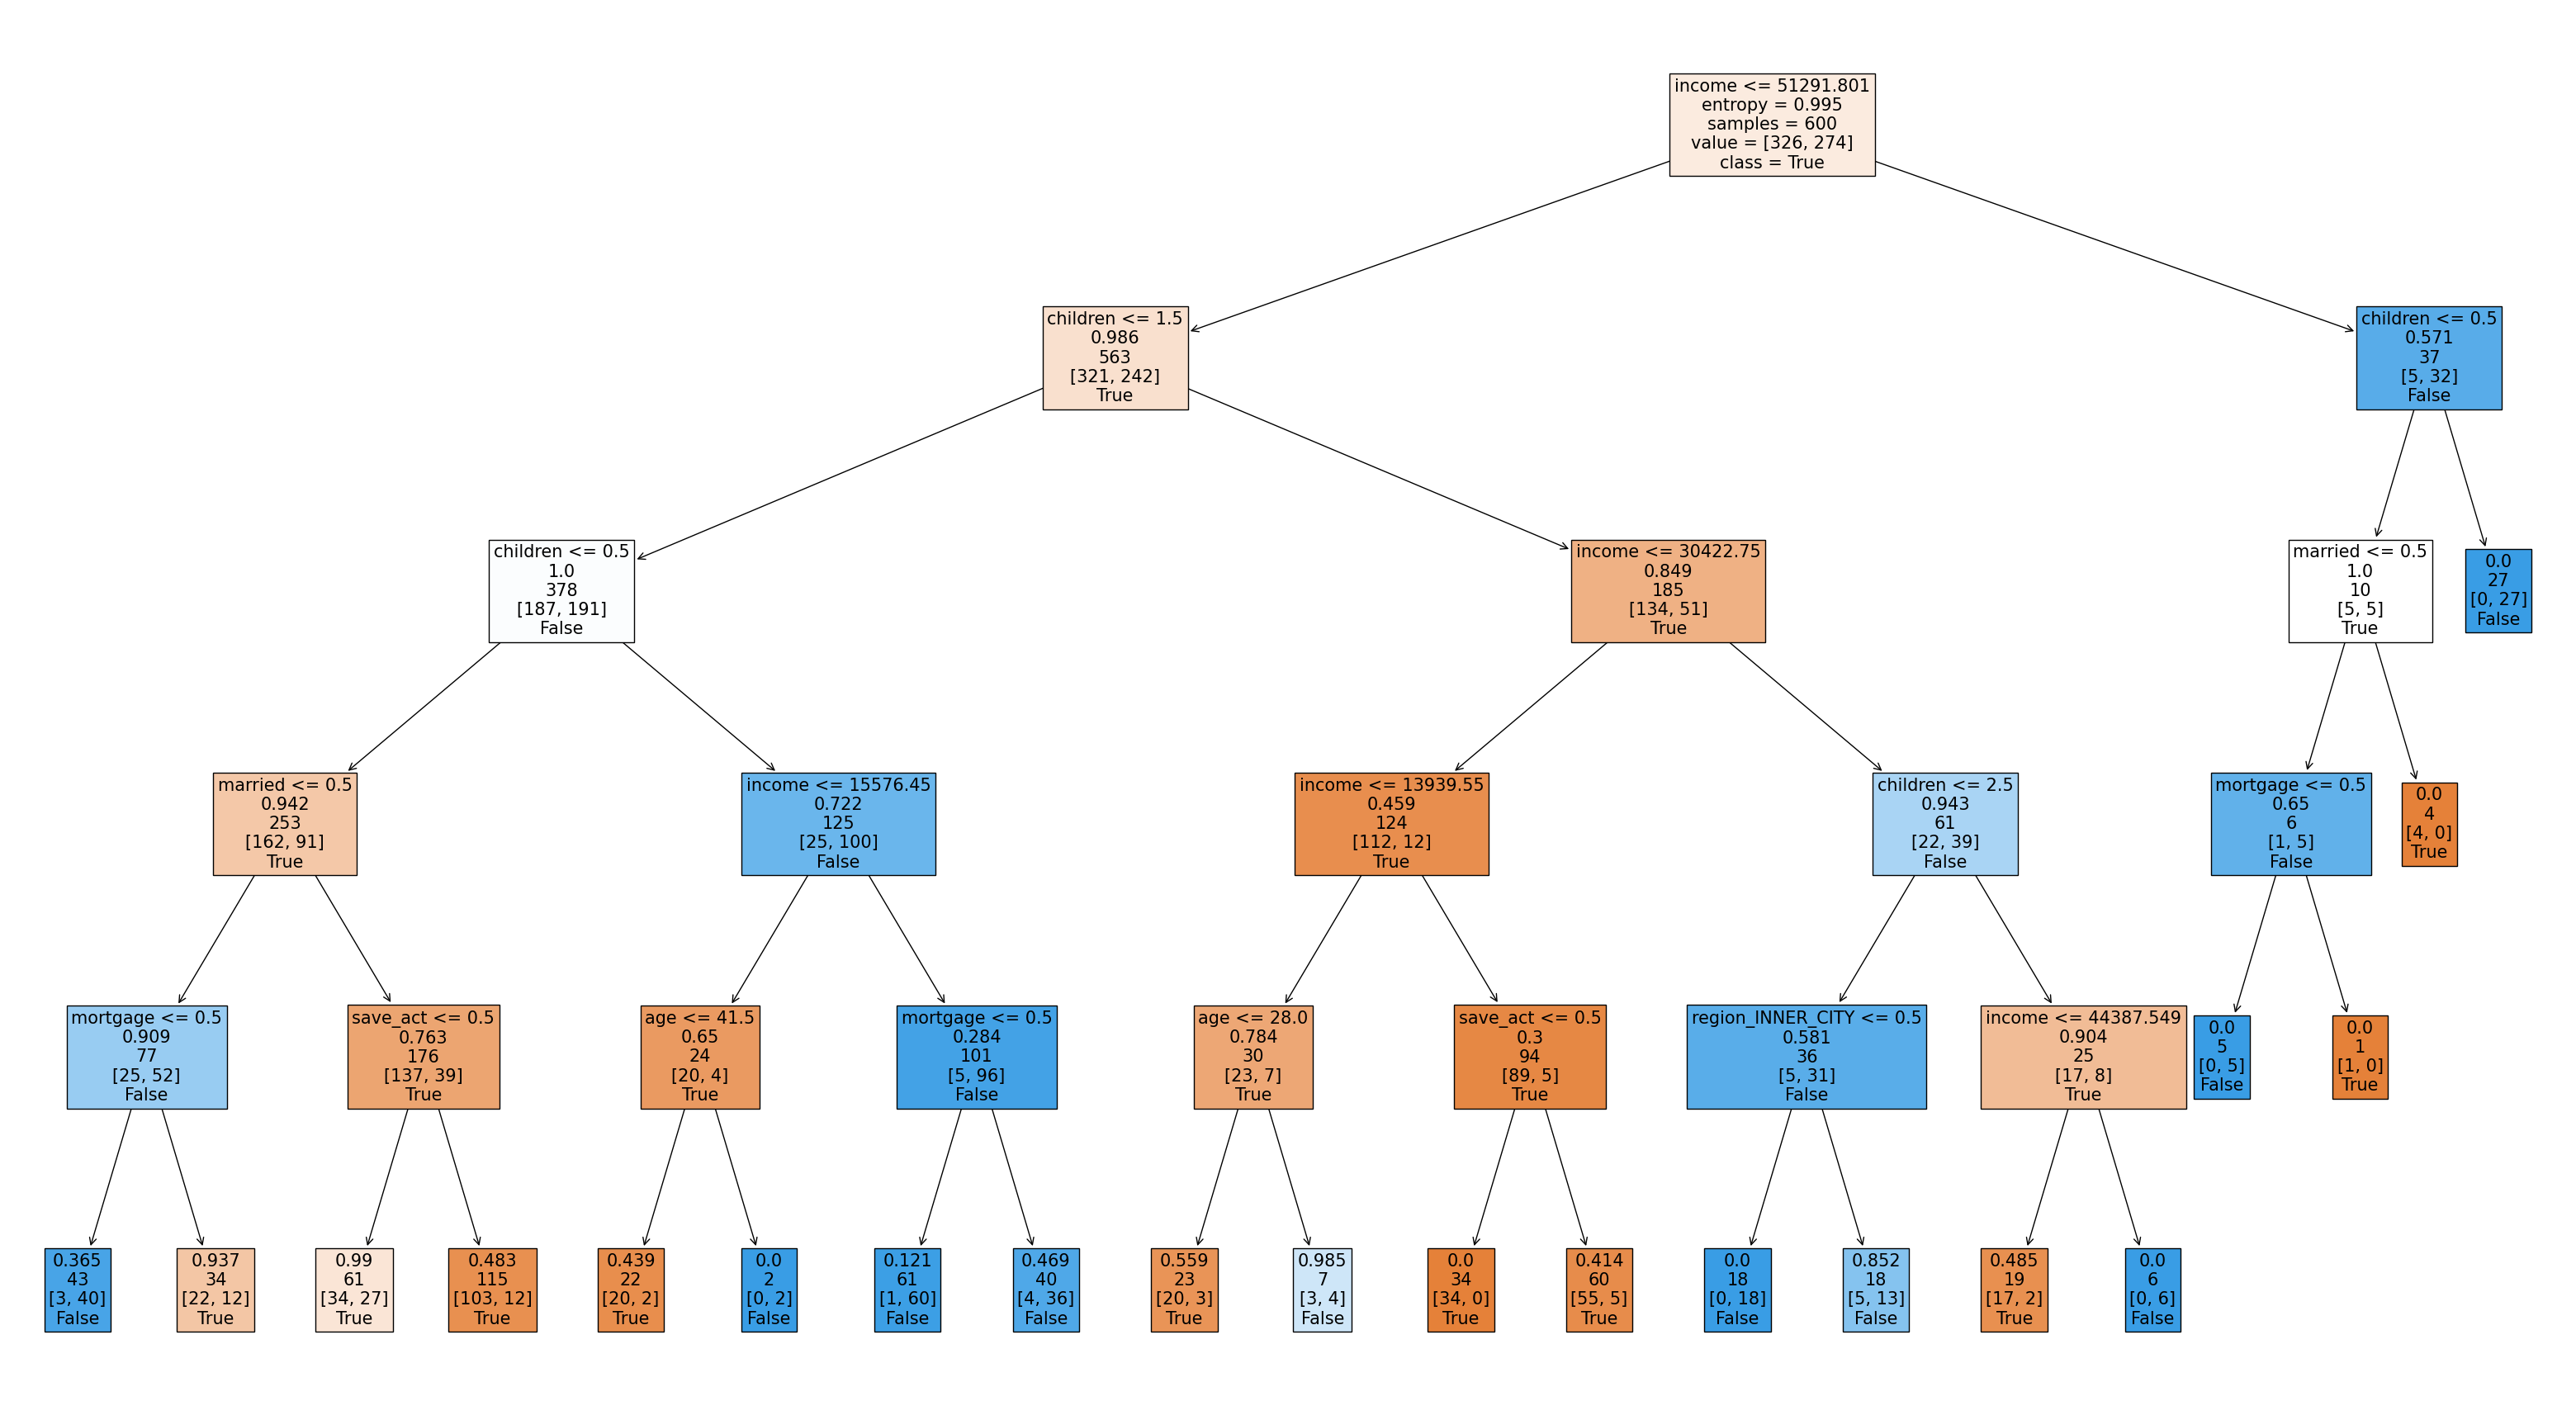

In [4]:
# Visualize the tree

plt.figure(figsize = (40, 22), dpi = 100)
plot_tree(model, fontsize = 15, feature_names = X.columns.tolist(), impurity = True, class_names = ["True", "False"], label = 'root', filled = True)
plt.show()

In [5]:
# Classification Accuracy Method 1:

print('Decision Tree Classification Accuracy %:', round(model.score(X, y) * 100,4))

Decision Tree Classification Accuracy %: 86.8333


In [6]:
# Classification Accuracy Method 2:

print('Decision Tree Classification Accuracy %:',round(float(accuracy_score(model.predict(X), y)) * 100,4))

Decision Tree Classification Accuracy %: 86.8333


# Out of Sample Model Performance

To evaluate any model, it is standard practice to use your trained model to make predictions on test data (data not used to build your model) and see how accurate the model is!

In [7]:
X_test = testing_df.drop(columns = ['pep']) # Features (test data); we already separated test records in pre-processing
y_test = testing_df.pep # Target variable (test data); we already separated test records in pre-processing

In [8]:
# Classification Accuracy Method 1:

print('Decision Tree Out-of-sample Classification Accuracy %:', round(model.score(X_test, y_test) * 100,4))

Decision Tree Out-of-sample Classification Accuracy %: 71.5


In [9]:
# Classification Accuracy Method 2:

print('Decision Tree Out-of-sample Classification Accuracy %:',round(float(accuracy_score(model.predict(X_test), y_test)) * 100,4))

Decision Tree Out-of-sample Classification Accuracy %: 71.5


# Train Test Split Function

So far, we have provided the training and testing data for you. However, you may often encounter situations where this data has not been partitioned already and you must do it yourself. This is accomplished with the [train_test_split()](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) function from Scikit-Learn! This is an important tool to understand, particularly for HW4!



To demonstrate the function in practice, we are going to further split the training data with the train_test_split() function.

**Note: You would typically do this to the original dataset.**

First let's create two new variables `X_A` and `y_A` that are identical to `X` and `y`, which represent the features and target variable respectively.

In [10]:
X_A = training_df.drop(columns = ['pep'])
y_A = training_df.pep

Our goal is to create and compare two different models based on classification accuracy.

Model A will be trained on the data as-is and evaluated on the same data used to induce the model.

In [11]:
A_model = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=3).fit(X_A, y_A)
print('Decision Tree Classification Accuracy %:',round(float(accuracy_score(A_model.predict(X_A), y_A)) * 100,4))

Decision Tree Classification Accuracy %: 86.8333


For Model B:
- 67% of the original training data will be used for training model B --> `X_B_train` and `y_B_train`
- 33% of the original training data will be used for testing model B --> `X_B_test` and `y_B_test`

In [12]:
X_B_train, X_B_test, y_B_train, y_B_test = train_test_split(X_A, y_A, test_size=0.33,random_state=3)

B_model = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=3).fit(X_B_train, y_B_train)
print('Decision Tree Classification Accuracy %:',round(float(accuracy_score(B_model.predict(X_B_test), y_B_test)) * 100,4))

Decision Tree Classification Accuracy %: 80.303


What takeaways can we make from the two models?

# Cross Validation

Cross-validation is a resampling technique used to evaluate machine learning models on a limited data sample. The main idea is to divide a dataset into a set number of 'folds' or 'chunks'. For each chunk, the model is trained on the remaining data and then tested on that chunk. This process repeats until each chunk has been used as a test set.

The main benefit of using cross-validation is that it provides a more robust measure of a model's predictive performance. Instead of relying on a single train-test split, which might be lucky or unlucky, you get an average score over multiple runs, each with a different test set. This helps in getting a better understanding of how the model might perform on unseen data.

Cross-validation also helps in identifying if a model is overfitting on the training data. By evaluating the model on different subsets of the training data, cross-validation can highlight if the model's performance varies significantly across different sets, which is a sign of overfitting.

Moreover, cross validation is useful for comparing the performance of different models or different configurations of the same model. By applying the same cross-validation procedure to different models, you can objectively compare their performance and select the best performing model.

For the purposes of this class, we will be using the [cross_val_score()](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html) function to perform the cross-validation procedure.

**The parameters for cross_val_score() are the model you want to evaluate, the features, the target or labels, and lastly, the number of cross validation splits.** The default accuracy metric/score used is a form of classification accuracy.

Let's say we want to split the data into 200 folds. This means that in each iteration, the model will be trained on 199/200 of the data and tested on the remaining 1/200 of the data.

In [13]:
scores = cross_val_score(model, X, y, cv = 200)

After running the cross-validation, you'll have a list of scores, one for each of the 200 folds. We are interested in the average performance across all 200 iterations. This line below calculates the average of these scores and prints it.

In [14]:
print('Decision-Tree 200-Fold Cross Validation Accuracy', scores.mean()*100,'%')

Decision-Tree 200-Fold Cross Validation Accuracy 84.5 %


Using CV = 200 is very exhaustive, especially with a large data set. It means that 199/200 (or 99.5%) of the data is used for training and 0.5% is used for testing in each iteration. If the dataset isn't large, this method might lead to very small test sets in each iteration, which can result in high variance in individual fold scores. **In this class, we will typically use 10-fold cross validation.**

# Confusion Matrix - Cost Sensitive Evaluation

When evaluating a model, it is essential to evaluate accuracy AND see where the model is making mistakes if different kinds of mistakes (errors) are more costly than others.

A confusion matrix visually conveys where the model's predictions are correct and where they deviate from the actual outcomes. Each row of the matrix represents the instances of an actual class while each column represents the instances of a predicted class.

- TP: Actual is true, predicted is true
- FP: Actual is false but predicted is true (Type 1 Error)
- TN: Actual is false, predicted is false
- FN: Actual is true but predicted is false (Type 2 Error)

We will be using the [confusion_matrix()](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) and [ConfusionMatrixDisplay()](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html) functions, and in this case, we are interested in the kinds of mistakes our model is making on the testing data.

In [20]:
predictions = model.predict(X_test)
# Here, we are storing the predictions our model is making for the target variable PEP based on the features in the testing data.

cm = confusion_matrix(y_test, predictions)
# The function takes the true Y values and the predicted Y values. The resulting object is returned as a numpy array.

print(cm)

[[111  39]
 [ 18  32]]


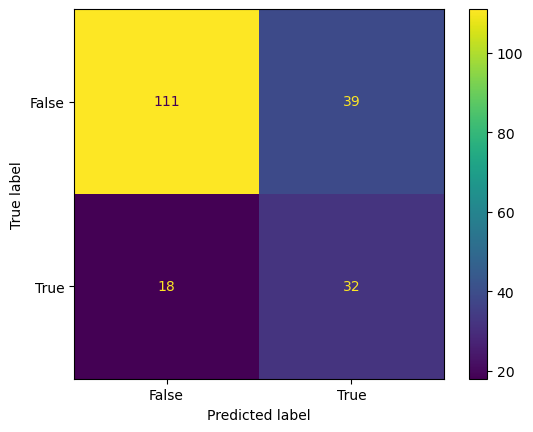

In [16]:
# We can better visualize the confusion matrix with the code below:

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
plt.show()

Based on the above matrix:

- TP: For 32 records of the test data where PEP = True, we correctly predicted these records to be True.
- FP: For 39 records of the test data where PEP = False, we incorrectly predicted these records to be True.
- TN: For 111 records of the test data where PEP = False, we correctly predicted these records to be False.
- FN: For 18 records of the test data where PEP = True, we incorrectly predicted these records to be False.

## Precision and Recall

**Precision is the ratio of correctly predicted positive observations to the total predicted positives.** It answers the question: "Out of all the instances the model predicted as positive, how many of those are actual positive instances?"

Precision = True Positives/(True Positive + False Positives)

**​Recall is the ratio of correctly predicted positive observations to all the actual positives**. It answers the question: "Out of all the actual positive instances, how many of those did the model correctly predict as positive?"

Recall = True Positives / (True Positives + False Negatives)

We can pull these values with the [precision_score()](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html) and [recall_score()](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html) functions, which both only need the true Y values and the predicted Y values.

In [17]:
print("Precision:", round(precision_score(y_test, predictions),2))
print("Recall:", round(recall_score(y_test, predictions),2))

Precision: 0.45
Recall: 0.64


So, in other words:

- Precision: When the model predicts that someone will buy a Personal Equity Plan (PEP), it is correct 45% of the time. This means that out of all the instances where the model predicts that a person will buy the PEP, only 45% of those predictions are correct. The other 55% are false positives, where the model incorrectly predicts that they will buy the PEP when they will not.

- Recall: The model correctly identifies 64% of the people who will actually buy the PEP. In other words, of all the people who actually buy the PEP, the model successfully detects 64% of them. The remaining 36% are false negatives, where the model fails to identify that they will buy PEP.

# ROC Curve

The Receiver Operating Characteristic (ROC) curve is a graphical plot that illustrates the performance of a binary classifier (where the target variable is True/1 or False/0) as its discrimination threshold is varied. The curve is created by plotting the true positive rate (TPR, also known as sensitivity) against the false positive rate (FPR, or 1-specificity) at various threshold settings.

The primary goal of the ROC curve is to visualize the trade-offs between sensitivity and specificity over various threshold levels, allowing us to pick an optimal threshold that balances both.

Additionally, the area under the ROC curve (AUC) provides a scalar value summarizing the overall performance of a model; **a value of 1.0 indicates perfect performance, while a value of 0.5 indicates that the model performs no better than random guessing.** In practice, a higher ROC AUC value indicates better model performance.

By visualizing the ROC curve with the [RocCurveDisplay()](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.RocCurveDisplay.html) function, we can better understand how the model performs at various levels of sensitivity and specificity, making the ROC curve a valuable tool in classifier evaluation.

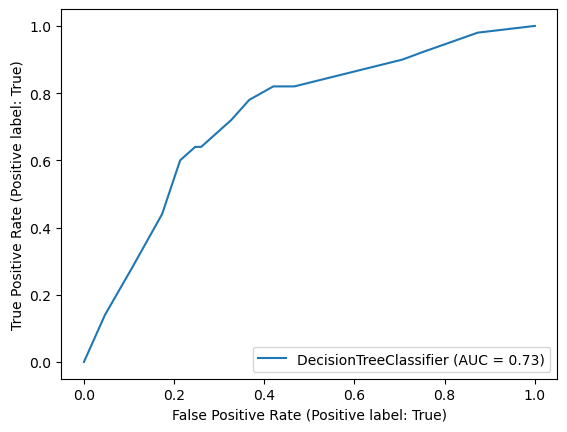

In [18]:
RocCurveDisplay.from_estimator(model, X_test, y_test)
plt.show()

# Here, we use RocCurveDisplay to plot a ROC Curve directly from a given model.
# All we have to do is give it the model, and our features and labels from the test set.

What takeaways can we make from this plot?

We can combine the concept of cross validation discussed earlier to find the ROC AUC score for our model by simplify specifying `scoring = 'roc_auc'` within the cross_val_score() function.

In [19]:
scores = cross_val_score(model, X, y, cv = 200, scoring = 'roc_auc')
print('Decision-Tree 200-Fold Cross Validation ROC AUC %:', scores.mean()*100)

Decision-Tree 200-Fold Cross Validation ROC AUC %: 88.125
